<a href="https://colab.research.google.com/github/aprameyap/Quantum-Half-Adder/blob/main/deutsch_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install qiskit
!pip install qiskit-aer

In [15]:
from qiskit import *
from qiskit.visualization import plot_histogram

def deutsch_algorithm(n, oracle):
    qc = QuantumCircuit(n, 1)
    qc.x(n-1)
    qc.h(range(n))
    qc.compose(oracle, range(n), inplace=True)
    qc.h(0)
    qc.measure(0,0)
    return qc

def deutsch_oracle(n, flag):
    oracle = QuantumCircuit(n, name = 'Deutsch Oracle')
    if flag == 1:
        oracle.z(range(n))
    return oracle

flag = int(input("Flag = ? (0 or 1) : "))

qc = deutsch_algorithm(8, deutsch_oracle(8, flag))

simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, simulator, shots=5196).result().get_counts()

qc.draw()

Flag = ? (0 or 1) : 1


┌───┐┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ Z ├┤ H ├┤M├
     ├───┤├───┤└───┘└╥┘
q_1: ┤ H ├┤ Z ├──────╫─
     ├───┤├───┤      ║ 
q_2: ┤ H ├┤ Z ├──────╫─
     ├───┤├───┤      ║ 
q_3: ┤ H ├┤ Z ├──────╫─
     ├───┤├───┤      ║ 
q_4: ┤ H ├┤ Z ├──────╫─
     ├───┤├───┤      ║ 
q_5: ┤ H ├┤ Z ├──────╫─
     ├───┤├───┤      ║ 
q_6: ┤ H ├┤ Z ├──────╫─
     ├───┤├───┤┌───┐ ║ 
q_7: ┤ X ├┤ H ├┤ Z ├─╫─
     └───┘└───┘└───┘ ║ 
c: 1/════════════════╩═
                     0

{'1': 5196}


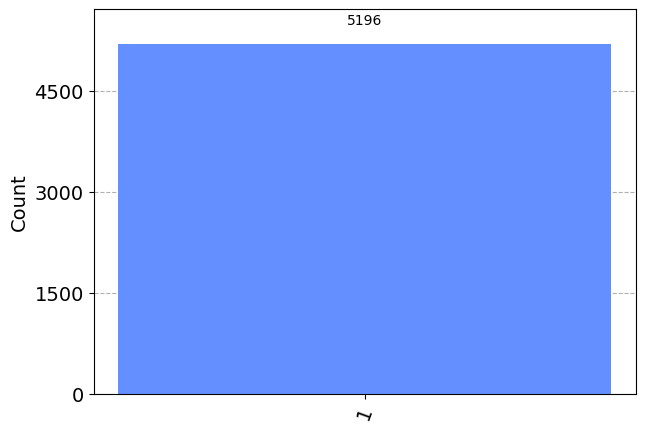

In [16]:
print(counts)
plot_histogram(counts)